In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
import pickle

df= pd.read_csv('bank-additional-full.csv', sep=';', encoding='utf-8')
# Results for all clients
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
display(df.describe())
display(df.describe(include=['O']))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [3]:
df.dtypes.sort_values(ascending=True)

age                 int64
previous            int64
pdays               int64
campaign            int64
duration            int64
nr.employed       float64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
housing            object
loan               object
contact            object
month              object
day_of_week        object
education          object
marital            object
job                object
poutcome           object
default            object
y                  object
dtype: object

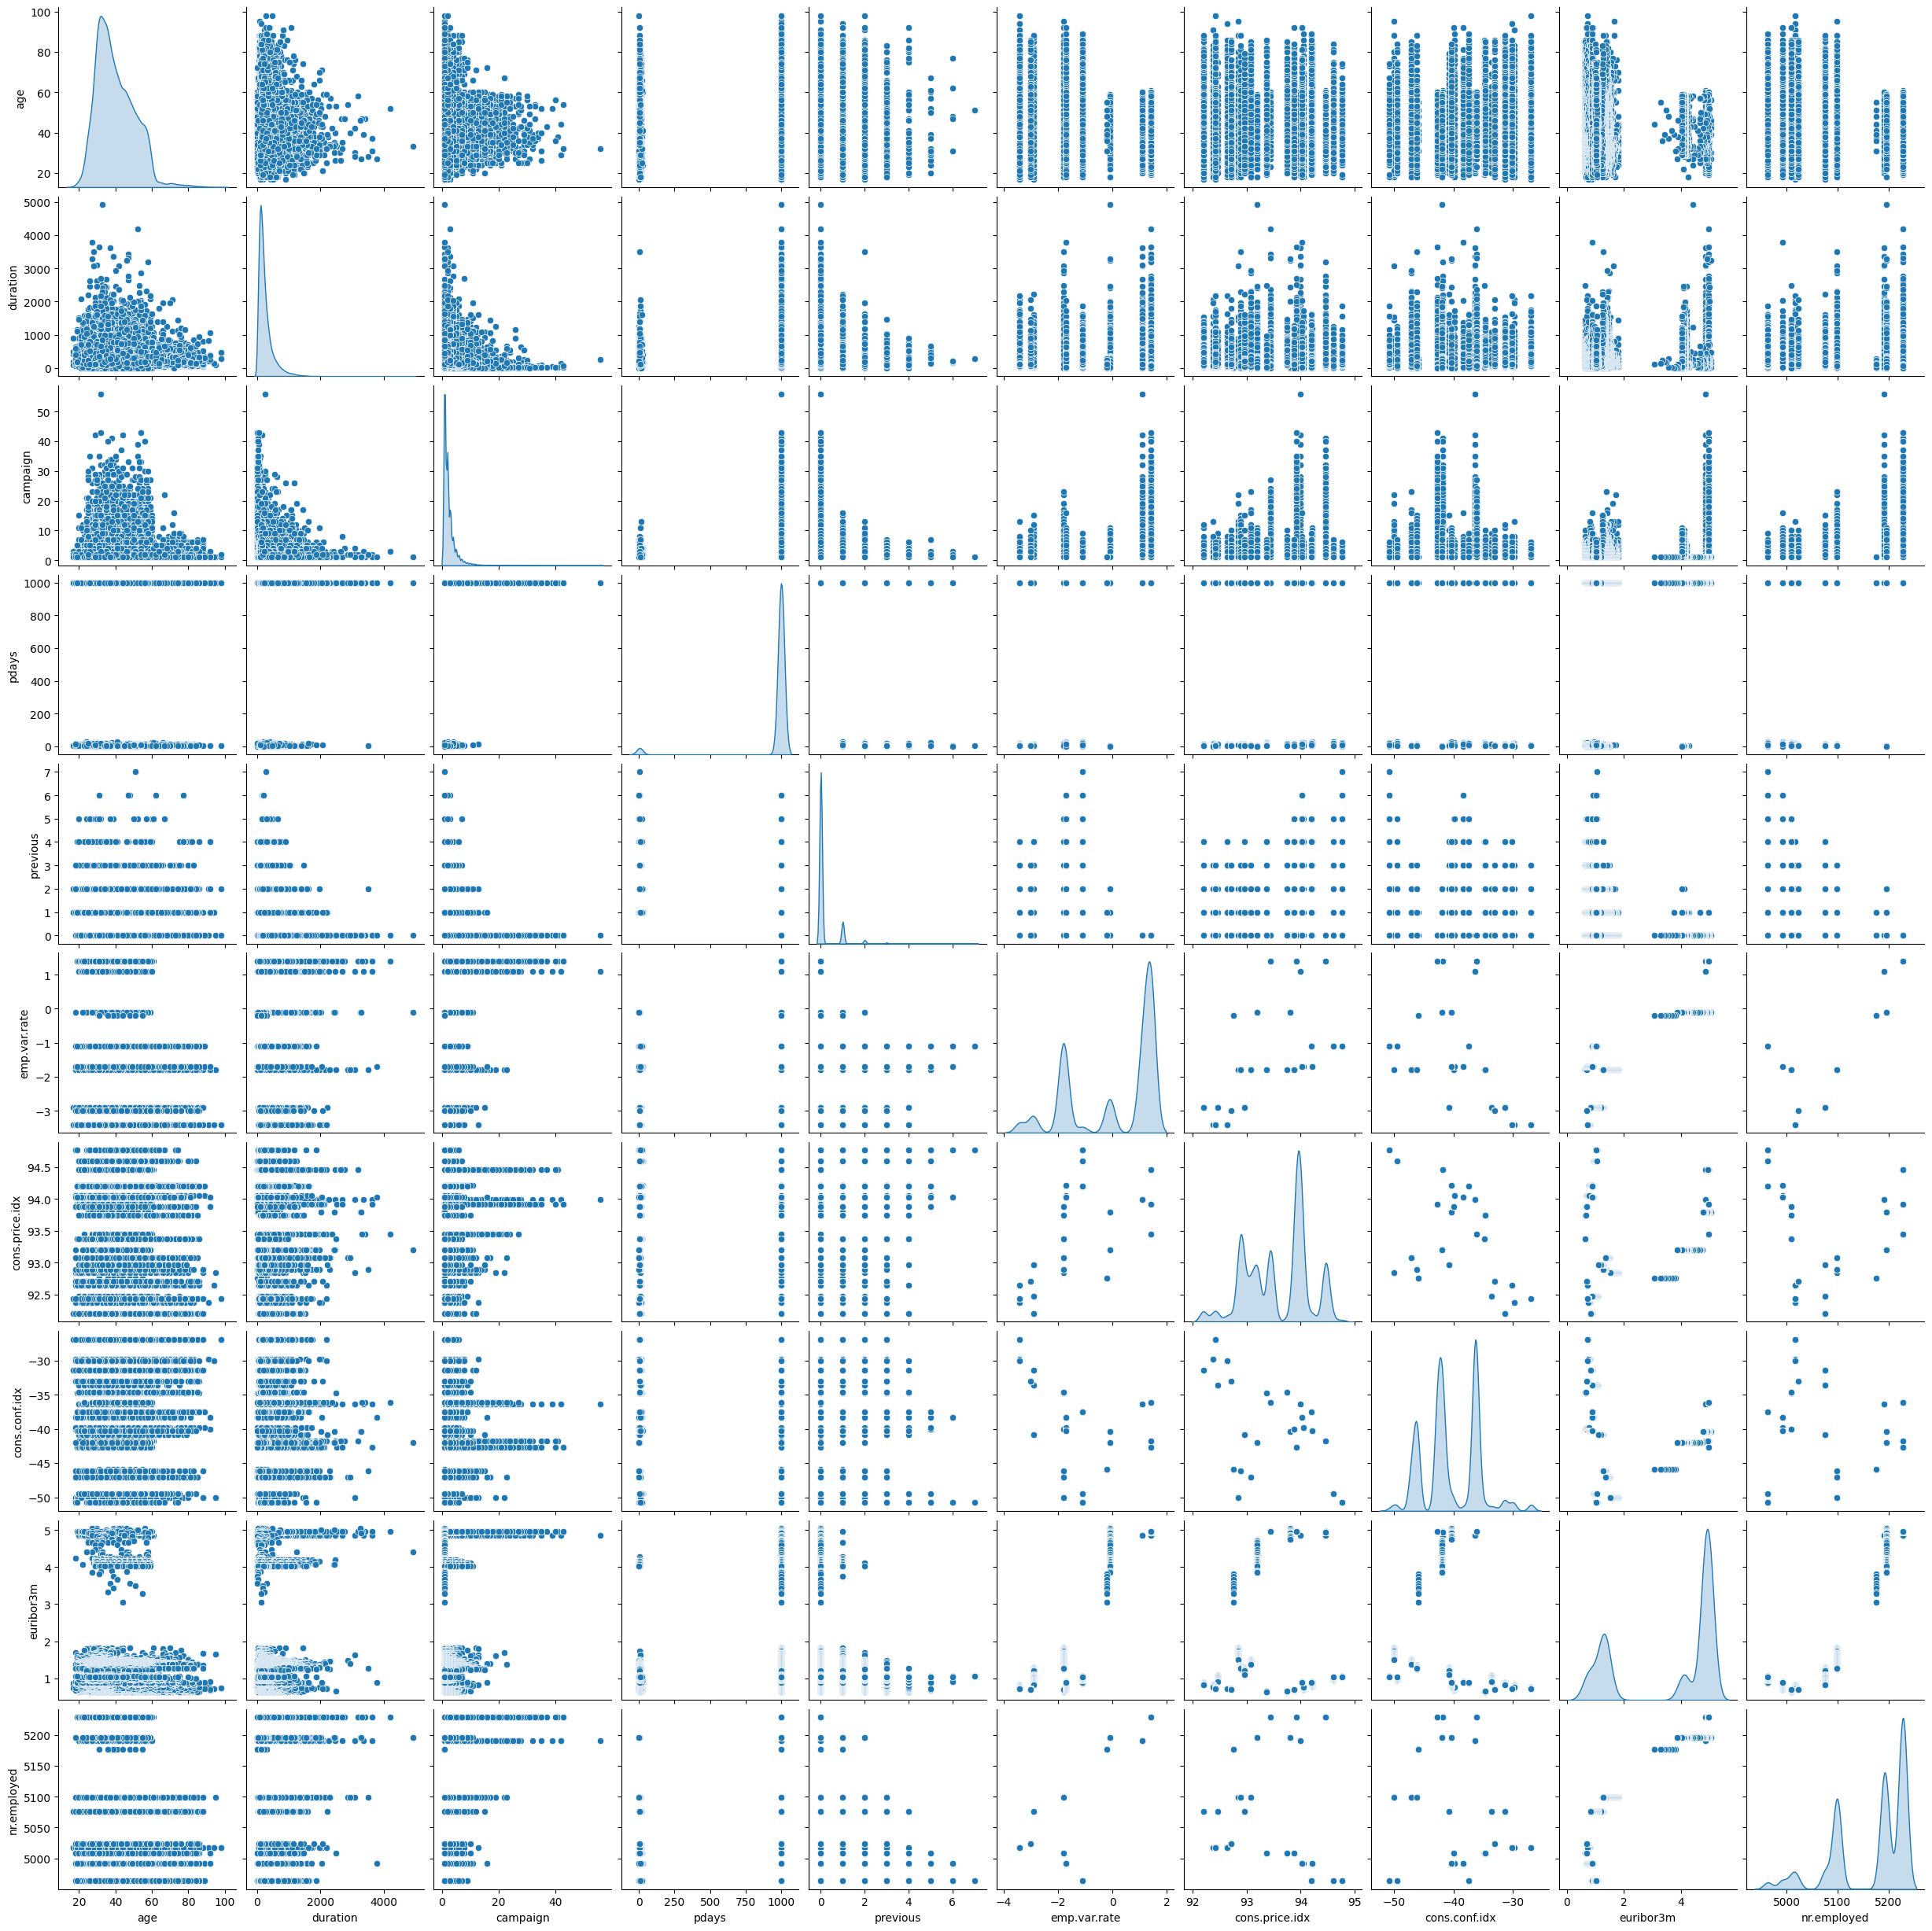

In [4]:
sns.pairplot(data=df,diag_kind='kde')
plt.show()

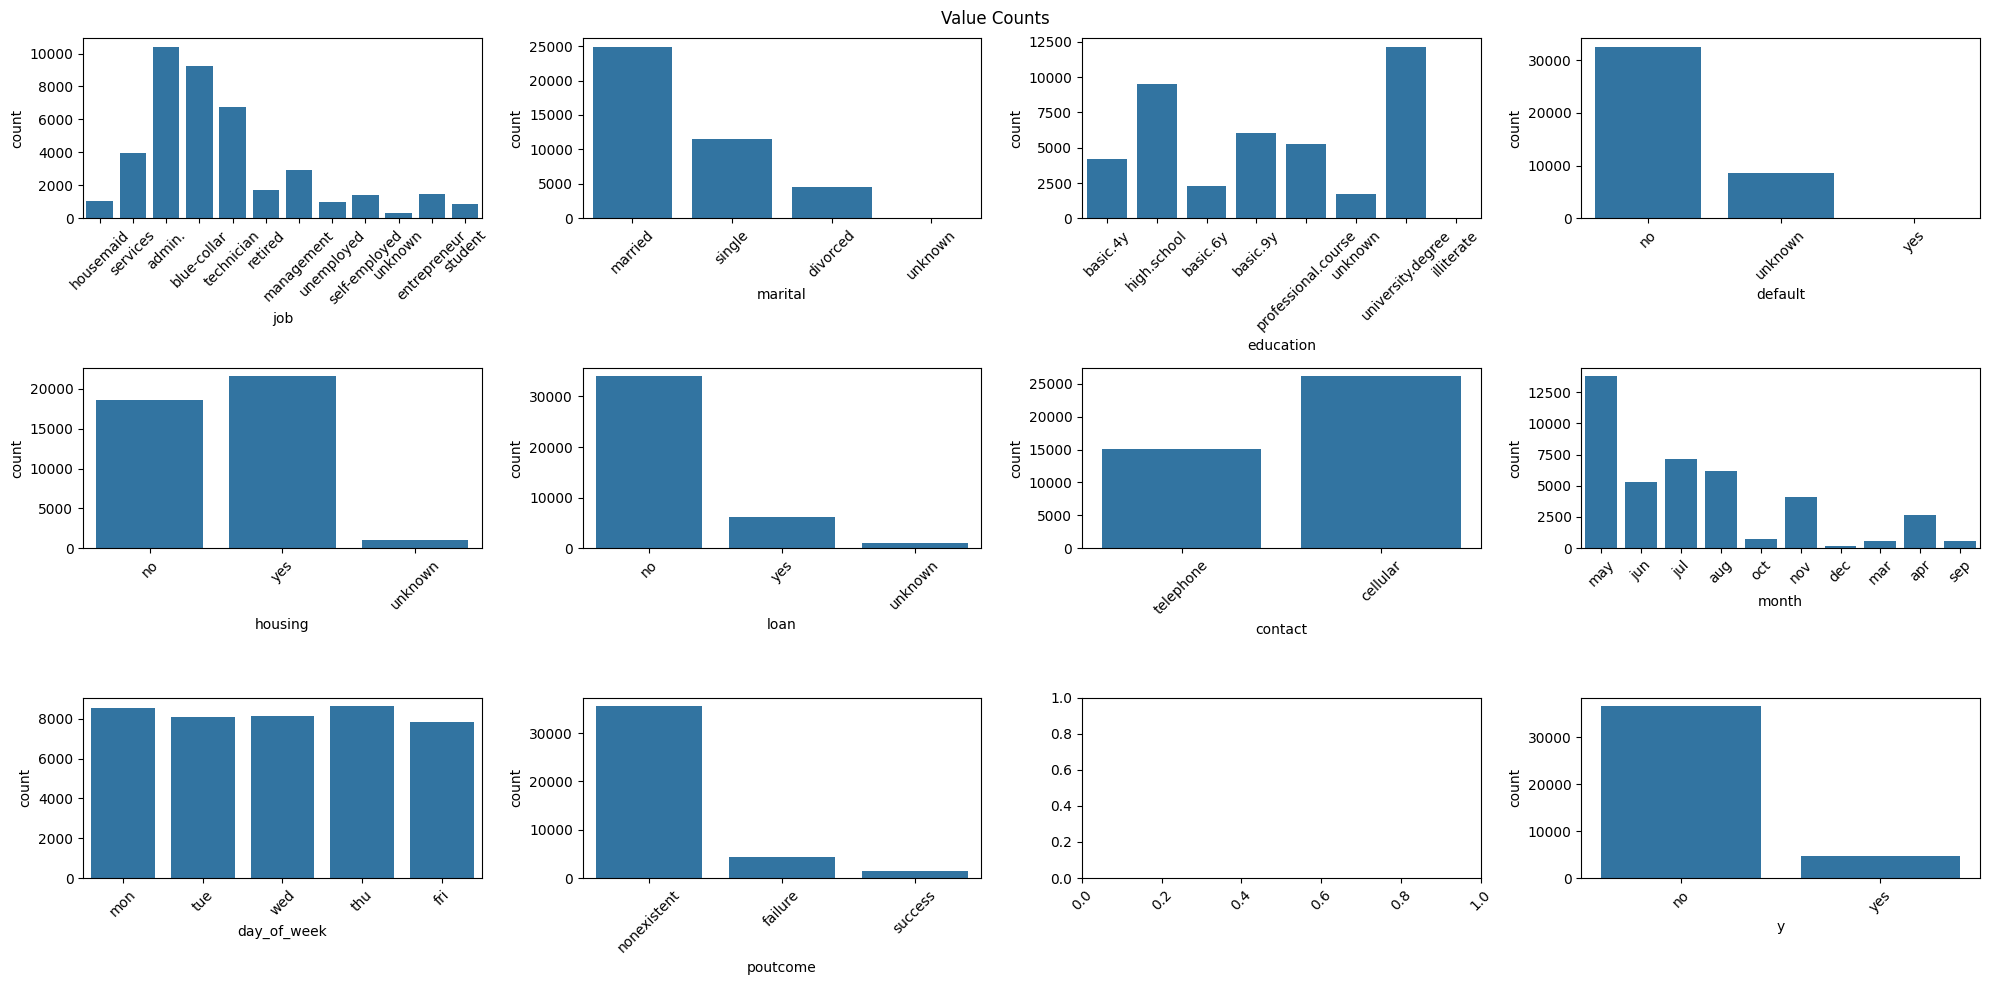

In [37]:
fig,ax2 = plt.subplots(3,4,figsize=(20,10))
fig.suptitle('Value Counts')
sns.countplot(ax=ax2[0,0],x=df.job)
sns.countplot(ax=ax2[0,1],x=df.marital)
sns.countplot(ax=ax2[0,2],x=df.education)
sns.countplot(ax=ax2[0,3],x=df.default)
sns.countplot(ax=ax2[1,0],x=df.housing)
sns.countplot(ax=ax2[1,1],x=df.loan)
sns.countplot(ax=ax2[1,2],x=df.contact)
sns.countplot(ax=ax2[1,3],x=df.month)
sns.countplot(ax=ax2[2,0],x=df.day_of_week)
sns.countplot(ax=ax2[2,1],x=df.poutcome)
sns.countplot(ax=ax2[2,3],x=df.y)
for ax in ax2.flatten():
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [17]:
df_y=df[df['y'] == 'yes']
df_y


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [18]:
display(df_y.describe())
display(df_y.describe(include=['O']))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640
unique,12,4,8,2,3,3,2,10,5,3,1
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,yes
freq,1352,2532,1670,4197,2507,3850,3853,886,1045,3141,4640


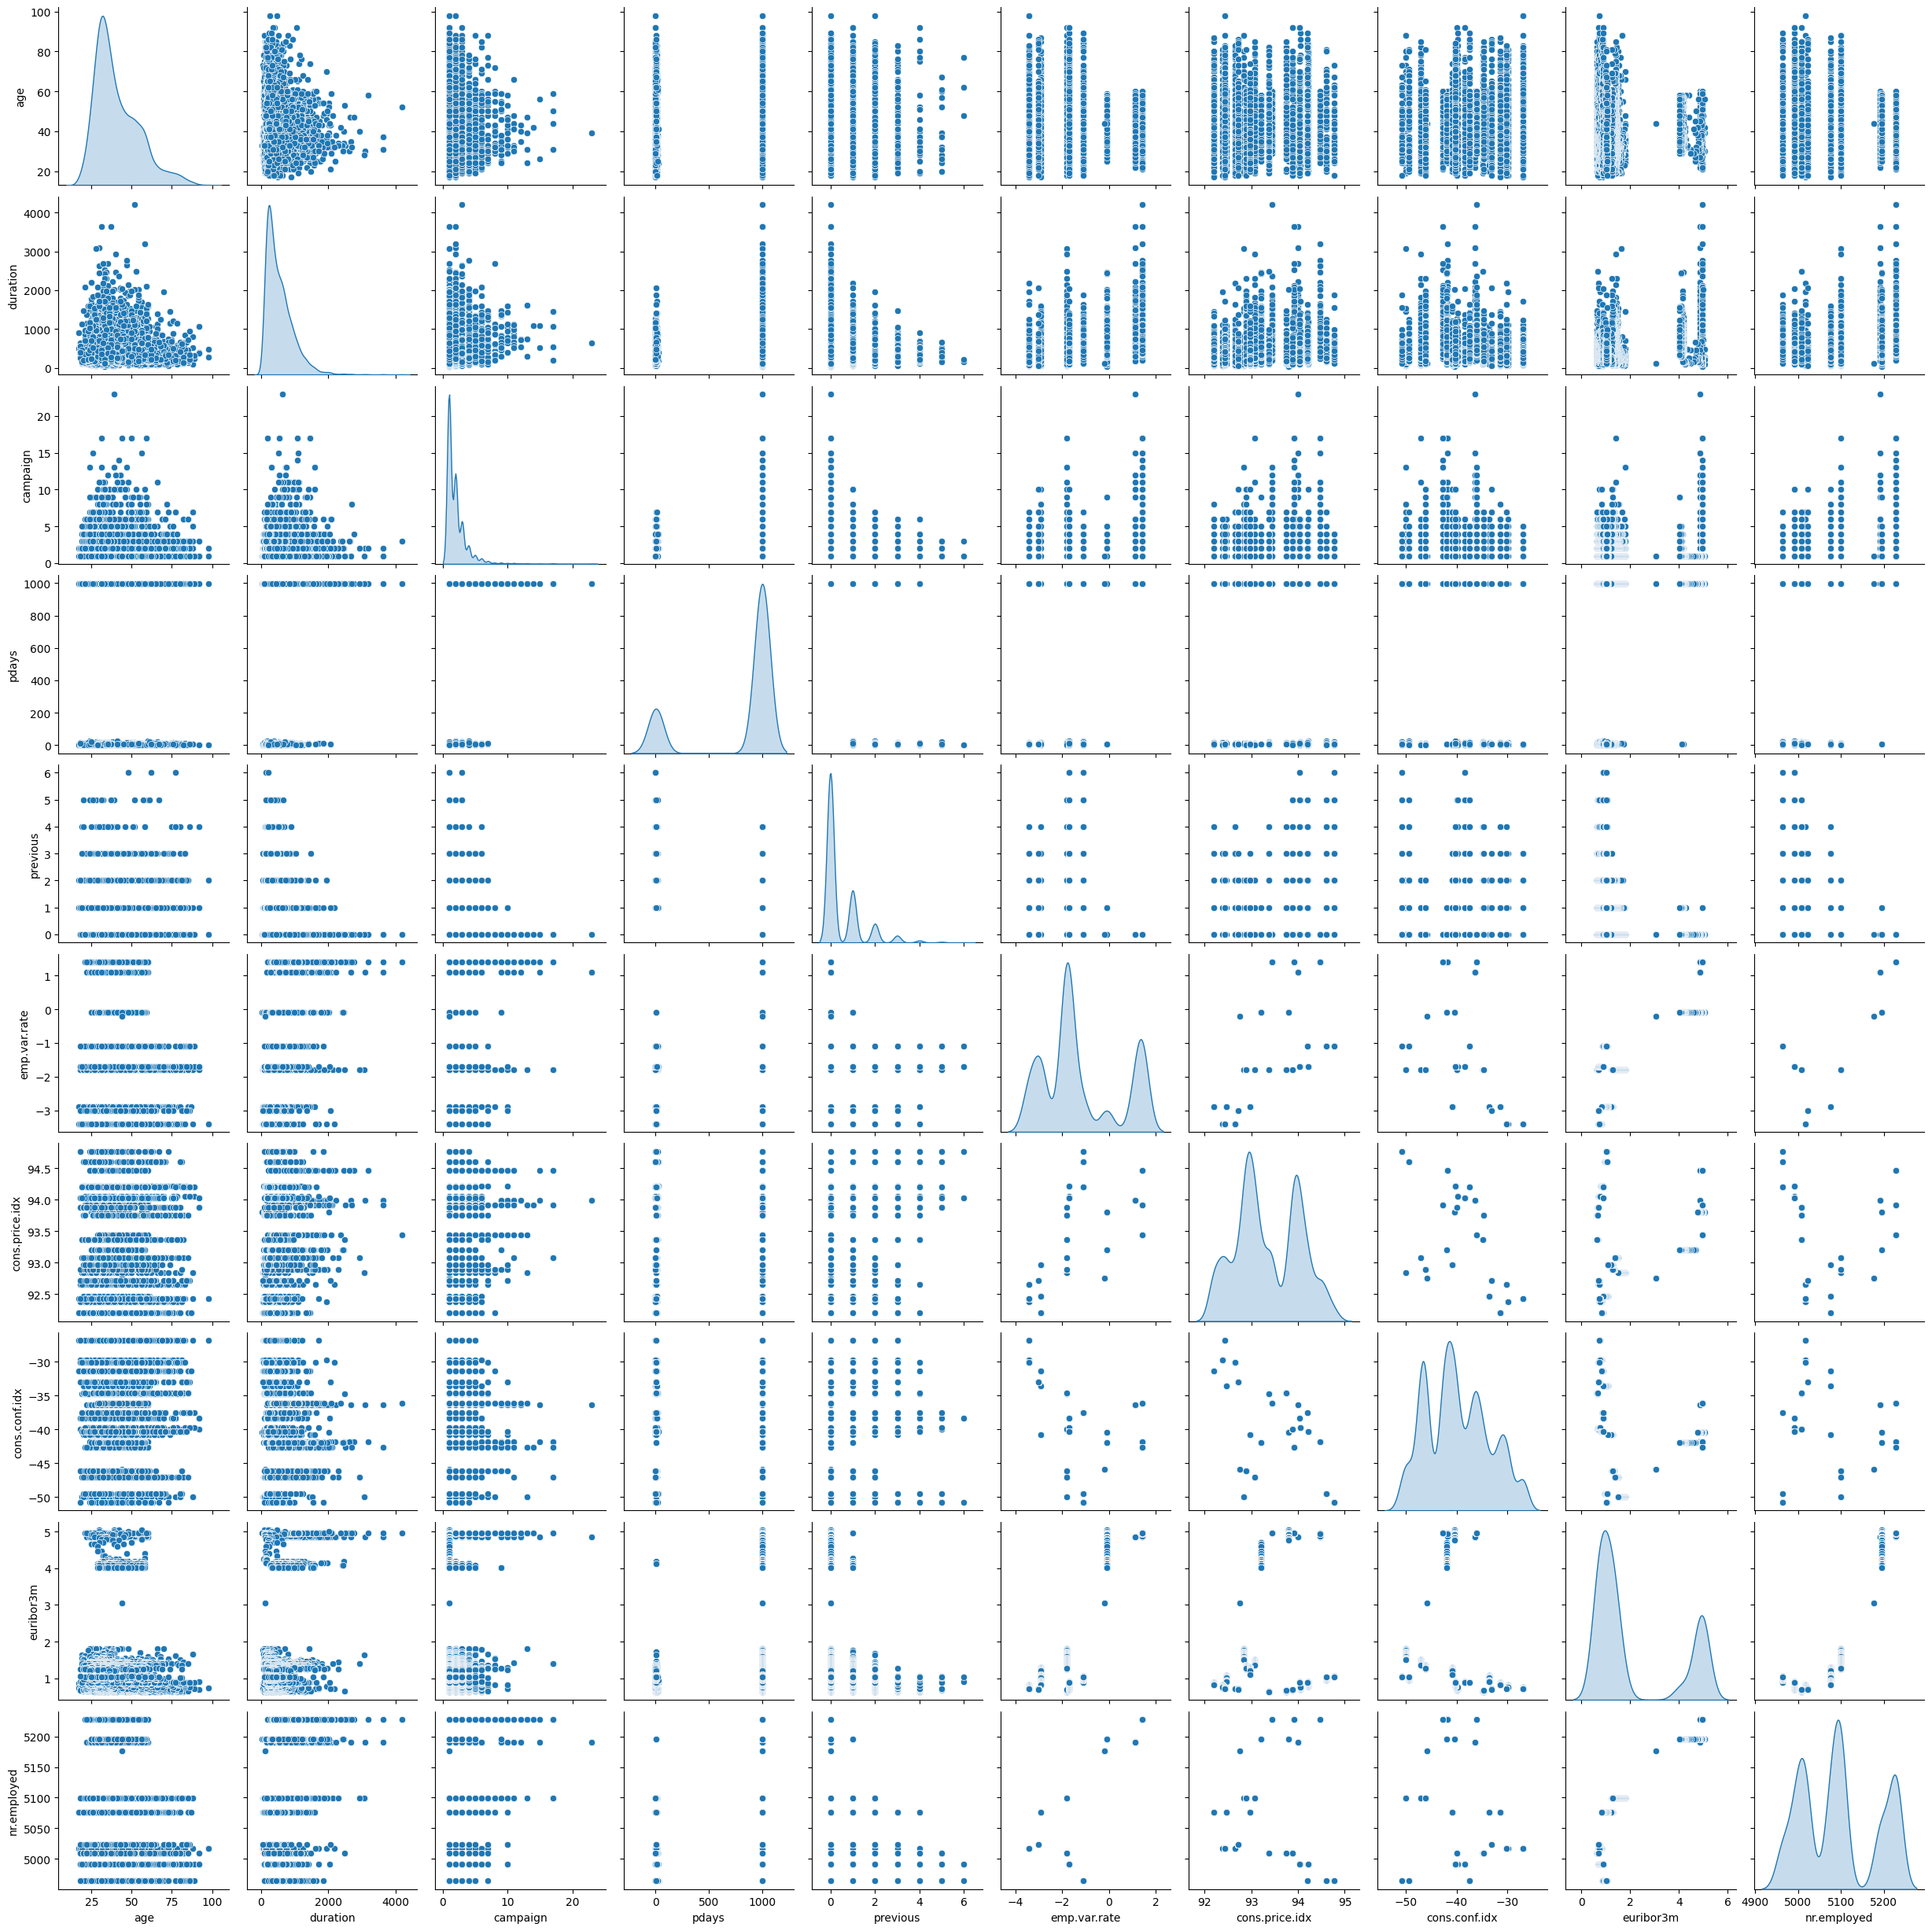

In [19]:
sns.pairplot(data=df_y,diag_kind='kde')
plt.show()

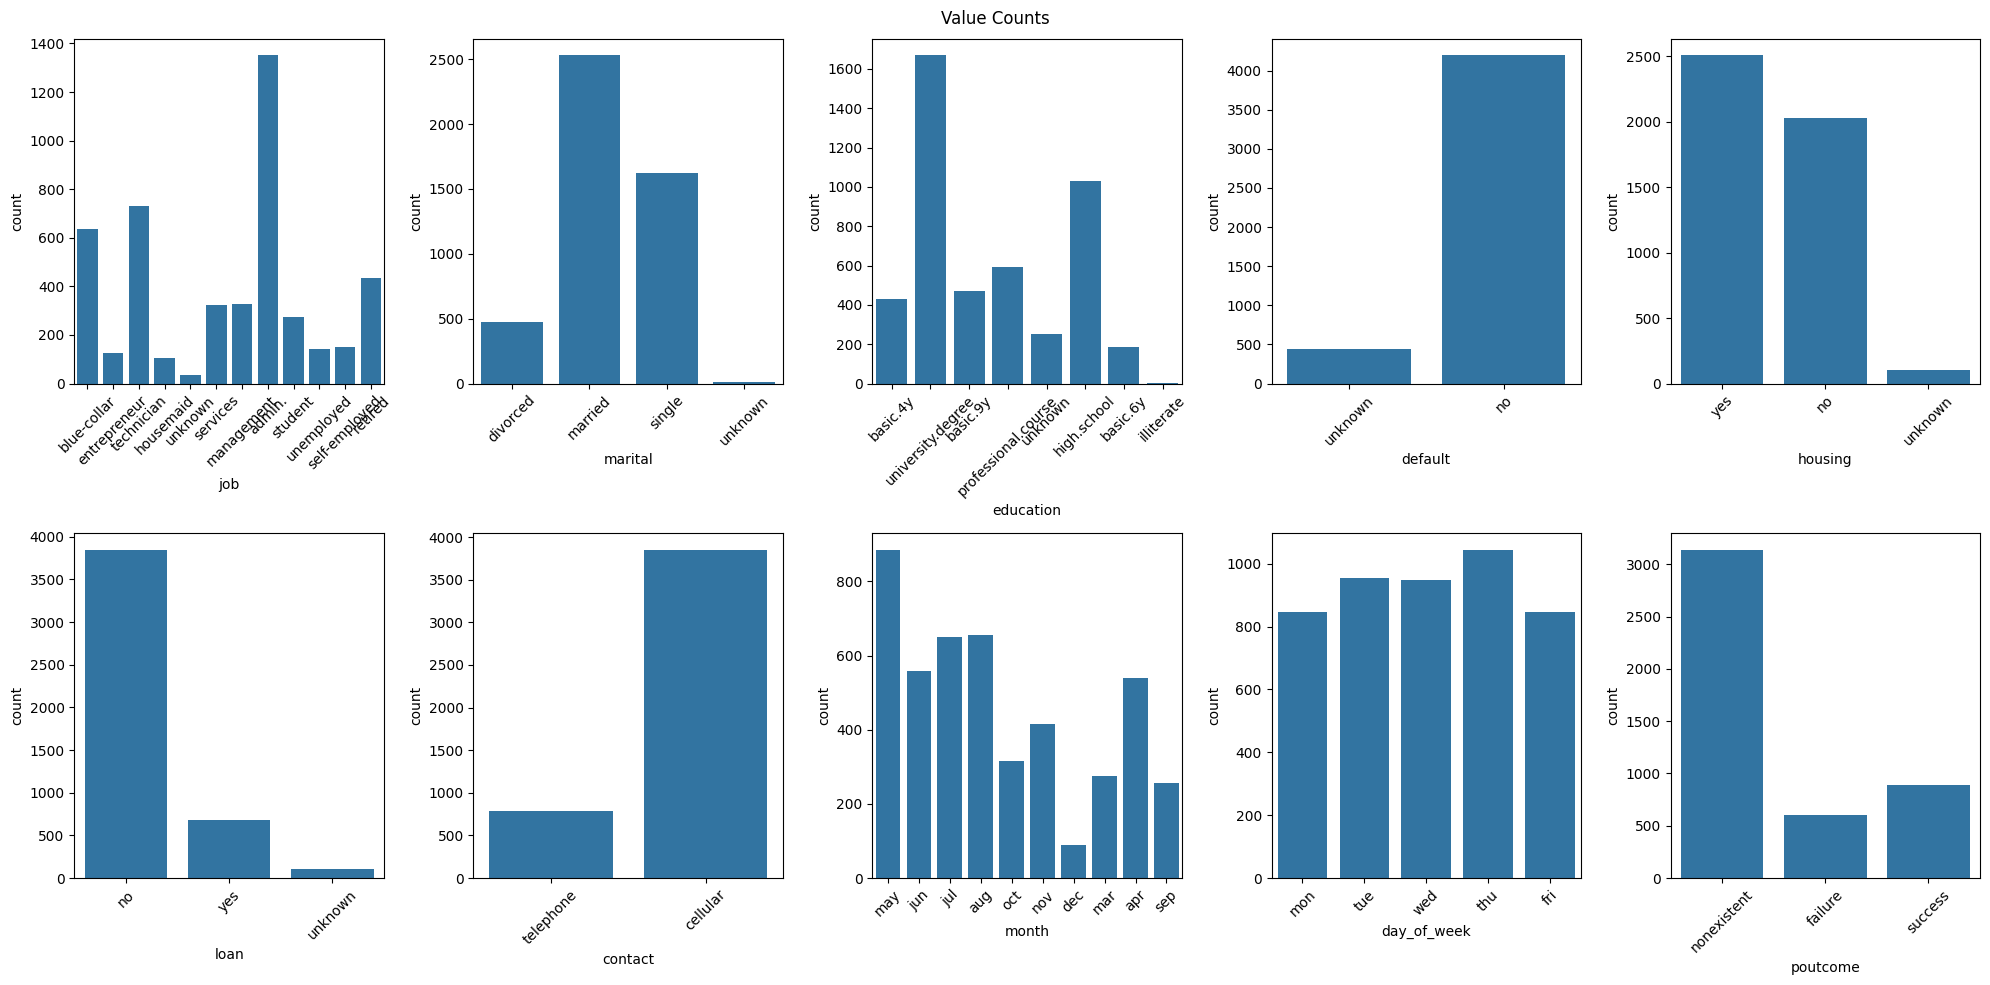

In [38]:
fig,ax2 = plt.subplots(2,5,figsize=(20,10))
fig.suptitle('Value Counts')
sns.countplot(ax=ax2[0,0],x=df_y.job)
sns.countplot(ax=ax2[0,1],x=df_y.marital)
sns.countplot(ax=ax2[0,2],x=df_y.education)
sns.countplot(ax=ax2[0,3],x=df_y.default)
sns.countplot(ax=ax2[0,4],x=df_y.housing)
sns.countplot(ax=ax2[1,0],x=df_y.loan)
sns.countplot(ax=ax2[1,1],x=df_y.contact)
sns.countplot(ax=ax2[1,2],x=df_y.month)
sns.countplot(ax=ax2[1,3],x=df_y.day_of_week)
sns.countplot(ax=ax2[1,4],x=df_y.poutcome)
for ax in ax2.flatten():
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

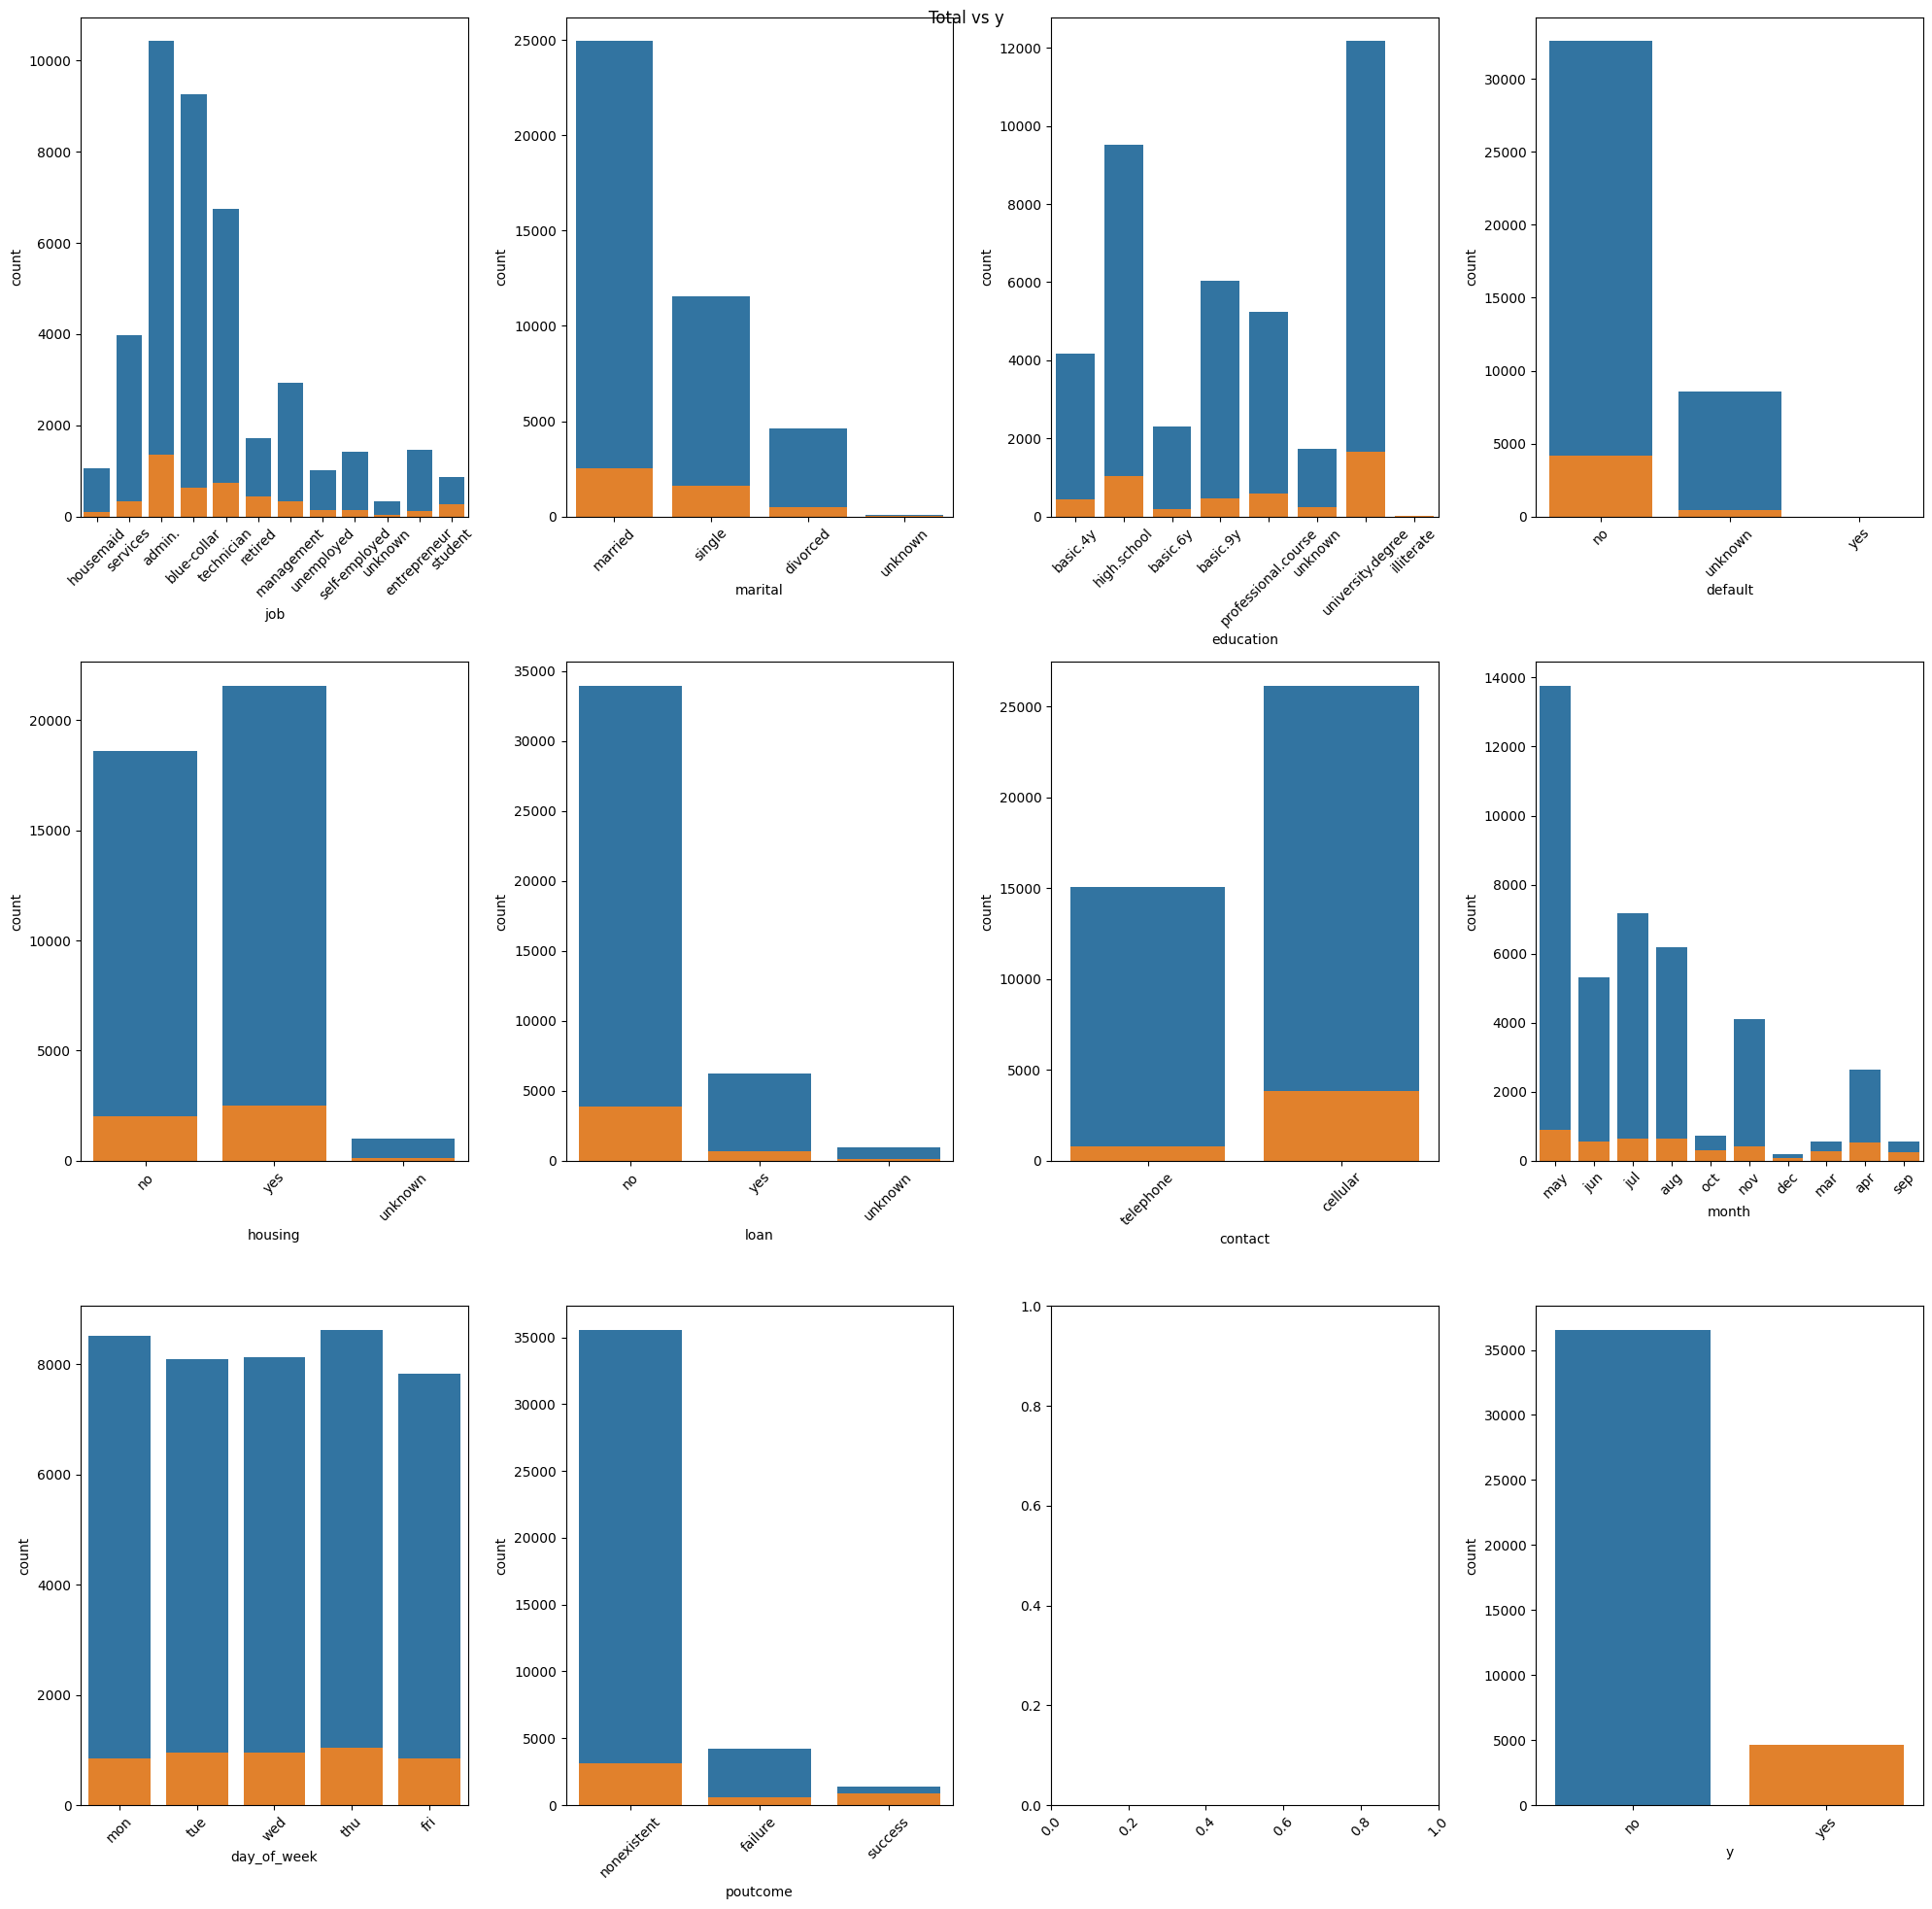

In [36]:
fig,ax2 = plt.subplots(3,4,figsize=(20,20))
fig.suptitle('Total vs y')
sns.countplot(ax=ax2[0,0],x=df.job)
sns.countplot(ax=ax2[0,1],x=df.marital)
sns.countplot(ax=ax2[0,2],x=df.education)
sns.countplot(ax=ax2[0,3],x=df.default)
sns.countplot(ax=ax2[1,0],x=df.housing)
sns.countplot(ax=ax2[1,1],x=df.loan)
sns.countplot(ax=ax2[1,2],x=df.contact)
sns.countplot(ax=ax2[1,3],x=df.month)
sns.countplot(ax=ax2[2,0],x=df.day_of_week)
sns.countplot(ax=ax2[2,1],x=df.poutcome)
sns.countplot(ax=ax2[2,3],x=df.y)
sns.countplot(ax=ax2[0,0],x=df_y.job)
sns.countplot(ax=ax2[0,1],x=df_y.marital)
sns.countplot(ax=ax2[0,2],x=df_y.education)
sns.countplot(ax=ax2[0,3],x=df_y.default)
sns.countplot(ax=ax2[1,0],x=df_y.housing)
sns.countplot(ax=ax2[1,1],x=df_y.loan)
sns.countplot(ax=ax2[1,2],x=df_y.contact)
sns.countplot(ax=ax2[1,3],x=df_y.month)
sns.countplot(ax=ax2[2,0],x=df_y.day_of_week)
sns.countplot(ax=ax2[2,1],x=df_y.poutcome)
sns.countplot(ax=ax2[2,3],x=df_y.y)
for ax in ax2.flatten():
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()